In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_house= pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/boston_house_price.csv")
boston_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 1. Correlation of Features using Heatmap

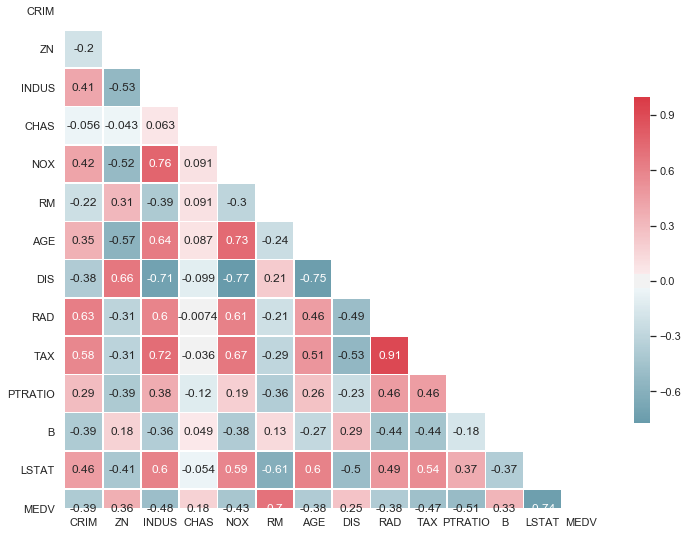

In [4]:
sns.set(style='white')

# Compute the correlation matrix
corr= boston_house.corr()
mask= np.zeros_like(corr, dtype= np.bool)

# Creating mask for upper triangular matrix
mask[np.triu_indices_from(mask)]= True
fig,ax= plt.subplots(figsize=(12,12))
cmap= sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask= mask, cmap=cmap, vmax=1, center=0, square= True, linewidths=.6, cbar_kws={'shrink':.5}, annot=True)

In [5]:
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

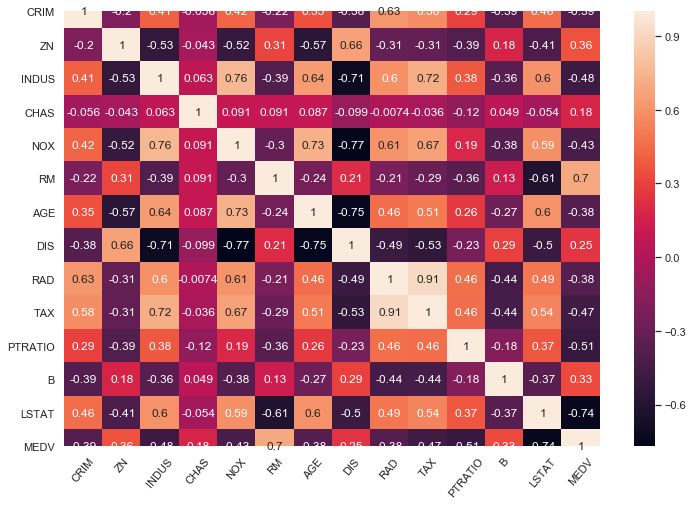

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(boston_house.corr(), xticklabels=boston_house.corr().columns.values,
            yticklabels=boston_house.corr().columns.values, annot=True);
plt.xticks(rotation=50)
plt.show()

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from IPython.display import Image
import os

#### 2. Hypothesis Testing

#### 2.a. Pearson's Correlation

In [8]:
# By default, '.corr()' uses pearson's correlation

boston_house['AGE'].corr(boston_house['MEDV'])

-0.37695456500459606

#### 2.b. Spearman Correlation

In [9]:
boston_house['RM'].corr(boston_house['MEDV'], method= 'spearman')

0.6335764254337745

#### 2.c. Chi-Square Relation (Was just trying to see what happens if I take such numeric values)

In [10]:
from scipy.stats import chi2_contingency

In [11]:
print("min age:", min(boston_house['AGE']))
print('max age:', max(boston_house['AGE']))

min age: 2.9
max age: 100.0


In [12]:
boston_house['age_bins']= pd.cut(boston_house['AGE'], bins=[20, 40, 60,80, 100])

In [13]:
cross_t= pd.crosstab(boston_house['age_bins'], boston_house['MEDV'], margins= True)
cross_t

MEDV,5.0,5.6,6.3,7.0,7.2,7.4,7.5,8.1,8.3,8.4,...,43.8,44.0,44.8,45.4,46.0,48.3,48.5,48.8,50.0,All
age_bins,,,,,,,,,,,,,,,,,,,,,
"(20, 40]",0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,3,75
"(40, 60]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,76
"(60, 80]",0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,81
"(80, 100]",2,1,0,2,3,1,1,1,2,1,...,0,0,0,0,0,0,0,1,11,240
All,2,1,1,2,3,1,1,1,2,2,...,1,1,1,1,1,1,1,1,16,472


In [14]:
chitest= chi2_contingency(pd.crosstab(boston_house['age_bins'], boston_house['MEDV']))
print(chitest)

(715.8573276014108, 0.04672027250853638, 654, array([[0.31779661, 0.15889831, 0.15889831, 0.31779661, 0.47669492,
        0.15889831, 0.15889831, 0.15889831, 0.31779661, 0.31779661,
        0.31779661, 0.15889831, 0.31779661, 0.15889831, 0.15889831,
        0.15889831, 0.47669492, 0.31779661, 0.31779661, 0.15889831,
        0.31779661, 0.15889831, 0.15889831, 0.15889831, 0.31779661,
        0.31779661, 0.31779661, 0.15889831, 0.15889831, 0.15889831,
        0.15889831, 0.15889831, 0.47669492, 0.15889831, 0.15889831,
        0.63559322, 0.15889831, 0.47669492, 0.63559322, 0.31779661,
        0.31779661, 0.79449153, 0.31779661, 0.15889831, 0.47669492,
        0.15889831, 0.31779661, 0.31779661, 0.47669492, 0.31779661,
        0.15889831, 0.47669492, 0.47669492, 0.15889831, 0.47669492,
        0.15889831, 0.31779661, 0.79449153, 0.15889831, 0.15889831,
        0.47669492, 0.31779661, 0.15889831, 0.15889831, 0.31779661,
        0.31779661, 0.31779661, 0.31779661, 0.15889831, 0.47669492,
  

#### 3. Linear Regression using StatsModel

In [15]:
import statsmodels.api as sm

In [16]:
X= sm.add_constant(boston_house['AGE'])
lr_model= sm.OLS(boston_house['MEDV'], X).fit()
predictions= lr_model.predict(X)

print_model= lr_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.57e-18
Time:                        18:56:06   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.0

C:\Users\bhave\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### 4. Using scikit-learn, verify atleast 2 assumptions in Linear Regression.

In [50]:
from sklearn.linear_model import LinearRegression

# Fitting the model

boston_model= LinearRegression()
boston_model.fit(boston_house[boston_house.columns[:-1]], boston_house[boston_house.columns[-1]])

# R^2 value of the column
boston_r2= boston_model.score(boston_house[boston_house.columns[:-1]], boston_house[boston_house.columns[-1]])
print("R^2 score:", boston_r2)

R^2 score: 0.7406426641094094


In [53]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    
    """
    predictions= model.predict(features)
    df_results= pd.DataFrame({'Actual':label, 'Predicted': predictions})
    df_results['Residuals']= abs(df_results['Actual'])- abs(df_results['Predicted'])
    
    return df_results

#### 1. Linearity

Assumes a linear relation between the predictors (independent variable) and response variable (dependent).

In [54]:
def linear_assumption(model, features, label):
    
    #calculate residual for the plot
    df_results= calculate_residuals(model, features, label)
    
    #plotting actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg= False, size=7)
    
    #Plotting the line
    line_coords= np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='black')
    plt.title("Actual v/s Predicted")

C:\Users\bhave\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


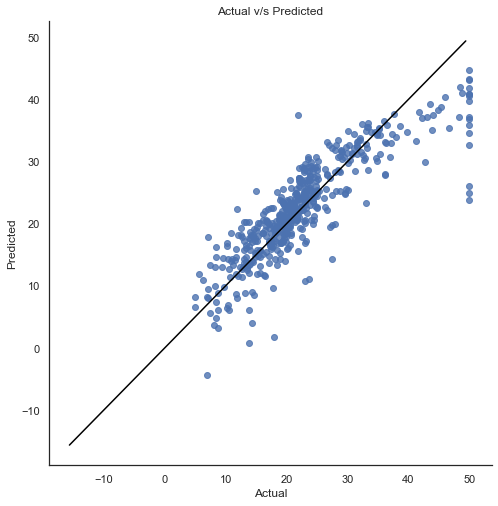

In [55]:
linear_assumption(boston_model, boston_house[boston_house.columns[:-1]], boston_house[boston_house.columns[-1]])

#### 2. Error term must be normally distributed

In [58]:
def normal_error_assumptions(model, features, label, p_value_thresh= 0.5):
    
    from statsmodels.stats.diagnostic import normal_ad
    
    #calculate residuals
    df_results= calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')
    
    #perform test on residual
    p_value= normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    if (p_value < p_value_thresh):
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
        
    # Plotting the residuals distribution
    plt.subplots(figsize=(12,6))
    plt.title("Residual Distribution")
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.311128328210816e-25
Residuals are not normally distributed


C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


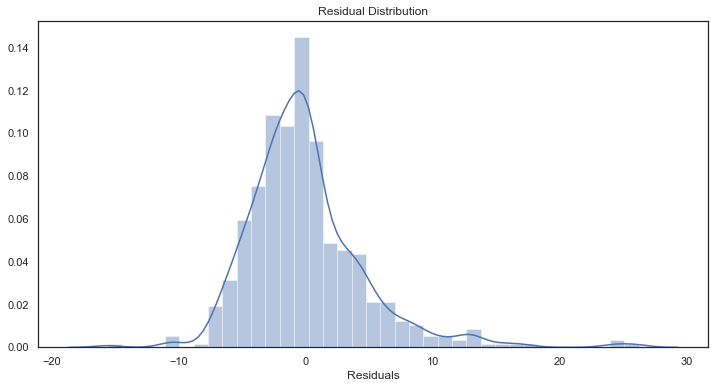

Assumption not satisfied


In [59]:
normal_error_assumptions(boston_model, boston_house[boston_house.columns[:-1]], boston_house[boston_house.columns[-1]])

#### 5. Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

In [19]:
boston_house= boston_house.drop(['age_bins', ], axis=1)
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(boston_house[boston_house.columns[:-1]],
                                                  boston_house[boston_house.columns[-1]], test_size=0.2, random_state=42)

In [21]:
compare_parameters= pd.DataFrame()
predictors= x_train.columns

#### ALpha 0.3

In [22]:
l_ridge= Ridge(alpha=0.3, random_state=0)
l_ridge.fit(x_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [23]:
print('Intercept coefficient:', l_ridge.intercept_)
compare_parameters['Ridge']= l_ridge.coef_

Intercept coefficient: 27.959941444774465


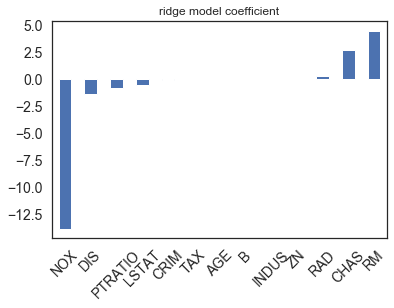

In [24]:
ridge_coef= pd.Series(l_ridge.coef_, predictors).sort_values()
ridge_coef.plot(kind='bar', fontsize= 14)
plt.title("ridge model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Error and Accuracy

In [25]:
ridge_pred= l_ridge.predict(x_test)

ridge_mse= np.mean((ridge_pred- y_test)** 2)
print("Mean Squared Error:", ridge_mse)

score= l_ridge.score(x_test, y_test)
print("Accuracy:", score)

Mean Squared Error: 24.335741332759664
Accuracy: 0.6681510173891254


#### Alpha 0.03

In [26]:
l_ridge= Ridge(alpha=0.03, random_state=0)
l_ridge.fit(x_train, y_train)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [27]:
print('Intercept coefficient:', l_ridge.intercept_)
compare_parameters['Ridge']= l_ridge.coef_

Intercept coefficient: 29.967571617336574


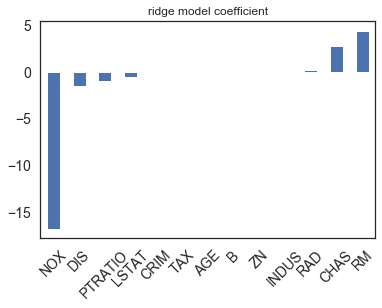

In [28]:
ridge_coef= pd.Series(l_ridge.coef_, predictors).sort_values()
ridge_coef.plot(kind='bar', fontsize= 14)
plt.title("ridge model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Error

In [29]:
ridge_pred= l_ridge.predict(x_test)

ridge_mse= np.mean((ridge_pred- y_test)** 2)
print("Mean Squared Error:", ridge_mse)

score= l_ridge.score(x_test, y_test)
print("Accuracy:", score)

Mean Squared Error: 24.293272738029344
Accuracy: 0.6687301310377078


#### Alpha 3

In [30]:
l_ridge= Ridge(alpha=3, random_state=0)
l_ridge.fit(x_train, y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [31]:
print('Intercept coefficient:', l_ridge.intercept_)
compare_parameters['Ridge']= l_ridge.coef_

Intercept coefficient: 22.551624553242608


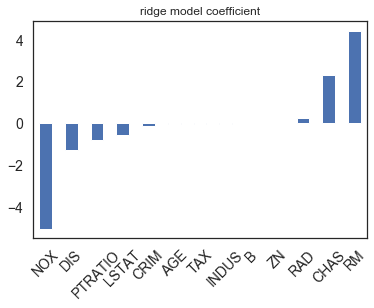

In [32]:
ridge_coef= pd.Series(l_ridge.coef_, predictors).sort_values()
ridge_coef.plot(kind='bar', fontsize= 14)
plt.title("ridge model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Error

In [33]:
ridge_pred= l_ridge.predict(x_test)

ridge_mse= np.mean((ridge_pred- y_test)** 2)
print("Mean Squared Error:", ridge_mse)

score= l_ridge.score(x_test, y_test)
print("Accuracy:", score)

Mean Squared Error: 24.6794109130069
Accuracy: 0.6634646427683601


#### Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

#### Alpha 0.3

In [35]:
l_lasso= Lasso(alpha=0.3, random_state=0)
l_lasso.fit(x_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
print("intercept coefficient:", l_lasso.intercept_)
compare_parameters['Lasso']= l_lasso.coef_

intercept coefficient: 23.24869346500879


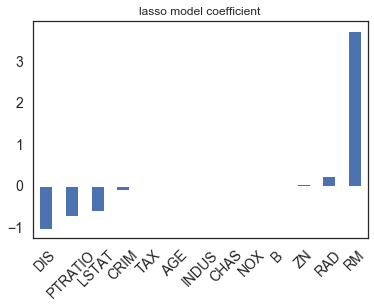

In [37]:
lasso_coef= pd.Series(l_lasso.coef_, predictors).sort_values()
lasso_coef.plot(kind='bar', fontsize= 14)
plt.title("lasso model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Error and Accuracy Score 

In [38]:
lasso_predict = l_lasso.predict(x_test)

# Calculate MSE
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
lasso_accuracy= l_lasso.score(x_test, y_test)
print('Accuracy', lasso_accuracy)

Mean Squared Error:  24.732269488504414
Accuracy 0.6627438484329313


#### Alpha=0.02

In [39]:
l_lasso= Lasso(alpha=0.03, random_state=0)
l_lasso.fit(x_train, y_train)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
print("intercept coefficient:", l_lasso.intercept_)
compare_parameters['Lasso']= l_lasso.coef_

intercept coefficient: 23.660894702156085


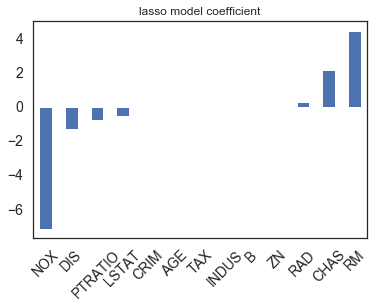

In [41]:
lasso_coef= pd.Series(l_lasso.coef_, predictors).sort_values()
lasso_coef.plot(kind='bar', fontsize= 14)
plt.title("lasso model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Error and Accuracy Score

In [42]:
lasso_predict = l_lasso.predict(x_test)

# Calculate MSE
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
lasso_accuracy= l_lasso.score(x_test, y_test)
print('Accuracy', lasso_accuracy)

Mean Squared Error:  24.56939612773787
Accuracy 0.6649648351834783


#### Alpha=3

In [43]:
l_lasso= Lasso(alpha=3, random_state=0)
l_lasso.fit(x_train, y_train)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
print("intercept coefficient:", l_lasso.intercept_)
compare_parameters['Lasso']= l_lasso.coef_

intercept coefficient: 34.7556098642101


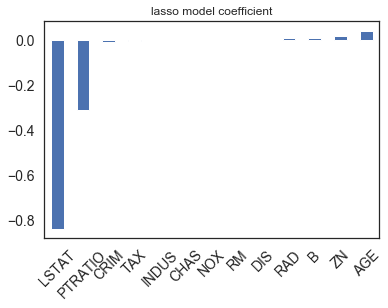

In [45]:
lasso_coef= pd.Series(l_lasso.coef_, predictors).sort_values()
lasso_coef.plot(kind='bar', fontsize= 14)
plt.title("lasso model coefficient")
plt.xticks(rotation= 45)
plt.show()

#### Mean Squared Erorr and Accuracy

In [46]:
lasso_predict = l_lasso.predict(x_test)

# Calculate MSE
lasso_mse= np.mean((lasso_predict- y_test)**2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
lasso_accuracy= l_lasso.score(x_test, y_test)
print('Accuracy', lasso_accuracy)

Mean Squared Error:  30.663768501565208
Accuracy 0.5818602671223463
